In [10]:
# Import the packages needed for analysis

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the data

marketing=pd.read_csv("marketing.csv")


marketing.head(n=15)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True
5,a100000034,1/1/18,House Ads,personalization,True,German,German,45-55 years,1/1/18,NaN,House Ads,True
6,a100000035,1/1/18,House Ads,personalization,True,English,English,55+ years,1/1/18,NaN,House Ads,True
7,a100000036,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
8,a100000037,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
9,a100000038,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True


In [3]:
# Check how many columns and rows are in the data

marketing.shape

(10037, 12)

In [4]:
# Use summary statistics to describe the data

marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [5]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])\
                                  ['user_id'].nunique()

print(total)

date_served
1/1/18     362
1/10/18    337
1/11/18    310
1/12/18    301
1/13/18    306
1/14/18    305
1/15/18    767
1/16/18    388
1/17/18    369
1/18/18    318
1/19/18    305
1/2/18     374
1/20/18    311
1/21/18    229
1/22/18    178
1/23/18    172
1/24/18    190
1/25/18    184
1/26/18    222
1/27/18    320
1/28/18    320
1/29/18    319
1/3/18     348
1/30/18    317
1/31/18    340
1/4/18     323
1/5/18     319
1/6/18     308
1/7/18     275
1/8/18     312
1/9/18     312
Name: user_id, dtype: int64


In [7]:
# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True]\
                       .groupby(['date_served'])\
                       ['user_id'].nunique()

print(subscribers)

date_served
1/1/18     36
1/10/18    40
1/11/18    25
1/12/18    23
1/13/18    26
1/14/18    26
1/15/18    87
1/16/18    99
1/17/18    81
1/18/18    29
1/19/18    18
1/2/18     37
1/20/18    21
1/21/18    20
1/22/18    22
1/23/18    21
1/24/18    22
1/25/18    23
1/26/18    20
1/27/18    21
1/28/18    20
1/29/18    19
1/3/18     36
1/30/18    21
1/31/18    18
1/4/18     35
1/5/18     40
1/6/18     35
1/7/18     39
1/8/18     36
1/9/18     39
Name: user_id, dtype: int64


In [9]:
# Calculate the conversion rate per day

daily_conversion_rate = subscribers/total

print(round(daily_conversion_rate*100,2))

date_served
1/1/18      9.94
1/10/18    11.87
1/11/18     8.06
1/12/18     7.64
1/13/18     8.50
1/14/18     8.52
1/15/18    11.34
1/16/18    25.52
1/17/18    21.95
1/18/18     9.12
1/19/18     5.90
1/2/18      9.89
1/20/18     6.75
1/21/18     8.73
1/22/18    12.36
1/23/18    12.21
1/24/18    11.58
1/25/18    12.50
1/26/18     9.01
1/27/18     6.56
1/28/18     6.25
1/29/18     5.96
1/3/18     10.34
1/30/18     6.62
1/31/18     5.29
1/4/18     10.84
1/5/18     12.54
1/6/18     11.36
1/7/18     14.18
1/8/18     11.54
1/9/18     12.50
Name: user_id, dtype: float64


Next we will Set-up our data to visualize daily conversion.
We need to understand how our campaign performed, it is essential to look at how key metrics changed throughout the campaign. Our key metrics can help us catch problems that may have happened during the campaign, such as a bug in the checkout system that led to a dip in conversion toward the end of our campaign. Metrics over time can also surface trends like gaining more subscribers over the weekends or on specific holidays.

In [12]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))

# Rename columns
daily_conversion_rate.columns = ['date_served', 
                                 'conversion_rate']

print(daily_conversion_rate)

   date_served  conversion_rate
0       1/1/18         0.099448
1      1/10/18         0.118694
2      1/11/18         0.080645
3      1/12/18         0.076412
4      1/13/18         0.084967
5      1/14/18         0.085246
6      1/15/18         0.113429
7      1/16/18         0.255155
8      1/17/18         0.219512
9      1/18/18         0.091195
10     1/19/18         0.059016
11      1/2/18         0.098930
12     1/20/18         0.067524
13     1/21/18         0.087336
14     1/22/18         0.123596
15     1/23/18         0.122093
16     1/24/18         0.115789
17     1/25/18         0.125000
18     1/26/18         0.090090
19     1/27/18         0.065625
20     1/28/18         0.062500
21     1/29/18         0.059561
22      1/3/18         0.103448
23     1/30/18         0.066246
24     1/31/18         0.052941
25      1/4/18         0.108359
26      1/5/18         0.125392
27      1/6/18         0.113636
28      1/7/18         0.141818
29      1/8/18         0.115385
30      

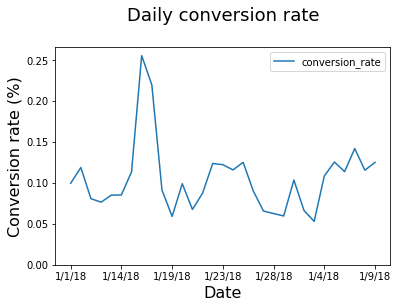

In [17]:
# Create a line chart using daily_conversion_rate
daily_conversion_rate.plot('date_served', 'conversion_rate')

plt.title('Daily conversion rate\n', size = 18)
plt.ylabel('Conversion rate (%)', size = 16)
plt.xlabel('Date', size = 16)

# Set the y-axis to begin at 0
plt.ylim(0)
# Display the plot
plt.show()